In [49]:
import qutip
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import pickle
import time as time
import math, cmath
import sys
import auxiliary_library as me

from IPython.display import display, Math, Latex

In [170]:
def hamiltonian_and_basis_obs(size, chain_type, Hamiltonian_parameters, default_ops = False):
    
    one_body_biglist = me.one_body_spin_ops(N)
    
    H_H = me.Heisenberg_Hamiltonian(one_body_biglist, chain_type, size, False, 
                                    Hamiltonian_parameters[0], Hamiltonian_parameters[1], Hamiltonian_parameters[2], 
                                    Hamiltonian_parameters[3])
    
    basis = []
    if default_ops:
        for i in range(len(one_body_biglist)):
            for j in range(len(one_body_biglist[i])):
                basis.append(one_body_biglist[i][j])
    else:
        basis = None
    
    return H_H, basis

In [174]:
def H_ij_matrix(basis, rho0):
    
    coeffs_list = []
    
    coeffs_list = [me.mod_HS_inner_prod(op1, (H_H * op2 - op2 * H_H), rho0) for op1 in basis for op2 in basis]
        
    coeffs_matrix = np.asarray(coeffs_list) # convert list to numpy array
    coeffs_matrix = coeffs_matrix.reshape(len(basis), len(basis)) # reshape array into N rows x N columns
    
    return coeffs_matrix

# initial conditions 

#Phi0_vector = [1 for i in range(len(basis))]

In [187]:
N = 4
chain_type = "XXZ"

sx_list = me.one_body_spin_ops(N)[1]
sz_list = me.one_body_spin_ops(N)[3]

Hamiltonian_parameters = [.15, .15, .2, 1.]
H_H, basis = hamiltonian_and_basis_obs(N, chain_type, Hamiltonian_parameters, False)

NN_correlators_x = [sx_list[i]*sx_list[i+1] + sx_list[i+1]*sx_list[i]  for i in range(3)] 
NN_correlators_x = NN_correlators_x + [sx_list[3]*sx_list[0]+sx_list[0]*sx_list[3]]

#ground_state_corr = [one_body_biglist[3][0] * one_body_biglist[3][j] for j in range(1,N)]
Mz = [sum(sz_list[i] for i in range(N))]

max_ent_basis = NN_correlators_x + Mz    

coeff_list_t0 = [np.random.rand() for i in range(len(max_ent_basis))]
rho0 = (sum(np.pi * coeff_list_t0[i] * max_ent_basis[i] for i in range(len(max_ent_basis)))).expm()
rho0 = rho0/rho0.tr()

if me.is_density_op(rho0):
    pass
else:
    sys.exit("Not a density operator")
    
hij_tensor = H_ij_matrix(max_ent_basis, rho0)


In [190]:
hij_tensor

array([[ 0.00000000e+00, -2.68882139e-17, -4.16333634e-17,
        -1.73472348e-18,  0.00000000e+00],
       [ 1.90819582e-17,  0.00000000e+00, -1.95156391e-17,
        -9.71445147e-17,  0.00000000e+00],
       [ 0.00000000e+00,  1.21430643e-17,  0.00000000e+00,
         3.20923843e-17,  0.00000000e+00],
       [ 6.50521303e-18,  2.77555756e-17, -3.29597460e-17,
         0.00000000e+00,  0.00000000e+00],
       [ 3.81639165e-17, -3.12250226e-16, -7.28583860e-17,
        -3.74700271e-16,  0.00000000e+00]])

In [196]:
def dPhi_vector_dt(t, Phi_vector):
    phi1, phi2, phi3, phi4, phi5 = Phi_vector
    return [hij_tensor[0][0] * phi1 + hij_tensor[0][1] * phi2 + hij_tensor[0][2] * phi3 + hij_tensor[0][3] * phi4 + hij_tensor[0][4] * phi5,
            hij_tensor[1][0] * phi1 + hij_tensor[1][1] * phi2 + hij_tensor[1][2] * phi3 + hij_tensor[1][3] * phi4 + hij_tensor[1][4] * phi5,
            hij_tensor[2][0] * phi1 + hij_tensor[2][1] * phi2 + hij_tensor[2][2] * phi3 + hij_tensor[2][3] * phi4 + hij_tensor[2][4] * phi5,
            hij_tensor[3][0] * phi1 + hij_tensor[3][1] * phi2 + hij_tensor[3][2] * phi3 + hij_tensor[3][3] * phi4 + hij_tensor[3][4] * phi5,
            hij_tensor[4][0] * phi1 + hij_tensor[4][1] * phi2 + hij_tensor[4][2] * phi3 + hij_tensor[4][3] * phi4 + hij_tensor[4][4] * phi5,
           ]

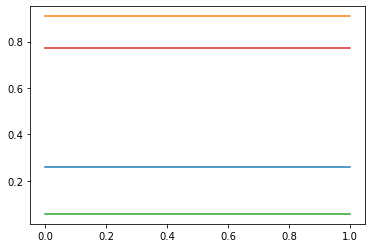

In [197]:
from scipy.integrate import odeint

x= np.linspace(0, 1, 100)
sol = odeint(dPhi_vector_dt, y0 = coeff_list_t0, t=x, tfirst = True)

for i in range(4):
    plt.plot(x, sol.T[i])
    
    

In [ ]:
# in cpp 
int x[100]; ## // 100 variables, not a "variable" number, but maybe useful for you!

int *px = new int[n]; ##// n variables, n is known at runtime;

# //best
std::vector<int> ints; 

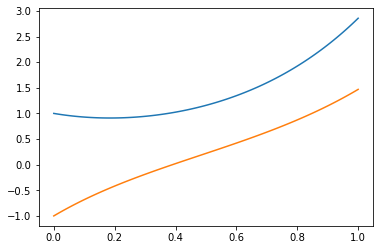

In [86]:
from scipy.integrate import odeint

def dSdx(x, S):
    phi1, phi2 = S
    return [1*phi1+2*phi2, 
            2*phi1-1.5*phi2]

S_0 = (1,-1)

x= np.linspace(0, 1, 100)
sol = odeint(dSdx, y0 = S_0, t=x, tfirst = True)

plt.plot(x, sol.T[0])
plt.plot(x, sol.T[1])


In [96]:
hij_tensor * 

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -9.71445147e-17-9.94461498e-01j,  1.38777878e-17-1.38559690e+00j,
        -7.97972799e-17-1.27876019e+00j,  8.67361738e-18-1.06352078e+00j,
        -1.11022302e-16+1.36443402e+00j, -2.08166817e-16+1.22259937e+00j,
        -2.77555756e-17+4.83951109e-01j,  7.63278329e-17+2.89883300e-01j,
        -1.73472348e-18-1.55692518e-02j,  2.60208521e-18-4.96523751e-03j,
        -8.23993651e-18+1.69012885e-02j, -3.03576608e-18+3.63320083e-03j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -9.71445147e-17-9.94461498e-01j,  1.38777878e-17-1.38559690e+00j,
        -7.97972799e-17-1.27876019e+00j,  8.67361738e-18-1.06352078e+00j,
        -1.11022302e-16+1.36443402e+00j, -2.08166817e-16+1.22259937e+00j,
        -2.77555756e-17+4.83951109e-0

In [120]:
a = [1,2,3,4]
a = np.asarray(a)
a = a.reshape(4,1)
a

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
Phi_list = [phi1, phi2, phi3, phi4, phi5, phi6, phi7, phi8, phi9, phi10, phi11, phi12, phi13, phi14, phi15, phi16]
Phi_vector = np.asarray(Phi_list)
Phi_vector = Phi_vector.reshape(16,1)
    
dphidt = dmatrix * Phi_vector 

In [121]:
def system_of_diff_eqs(dmatrix):
    
    Phi_list = [phi1, phi2, phi3, phi4, phi5, phi6, phi7, phi8, phi9, phi10, phi11, phi12, phi13, phi14, phi15, phi16]
    Phi_vector = np.asarray(Phi_list)
    Phi_vector = Phi_vector.reshape(16,1)
    
    dphidt = dmatrix * Phi_vector 
    
    return dphidt

In [127]:
a = np.random.rand()
a

0.8454695379637733

In [130]:
phi1 =np.random.rand(); phi2=np.random.rand(); phi3=np.random.rand(); phi4=np.random.rand(); 
phi5=np.random.rand(); phi6=np.random.rand(); phi7=np.random.rand(); phi8=np.random.rand();
phi9=np.random.rand(); phi10=np.random.rand(); phi11=np.random.rand(); phi12=np.random.rand(); 
phi13=np.random.rand(); phi14=np.random.rand(); phi15=np.random.rand(); phi16=np.random.rand(); 

x = np.linspace(0, 1, 100)

sol = odeint(system_of_diff_eqs(hij_tensor), y0 = Phi_vector_t0, t = x, tfirst = True)

error: The function and its Jacobian must be callable functions.

In [104]:
def system_of_diff_eqs(dmatrix):
    
    vector = np.full((8,1),1)

    Lmu = []

    for i in range(len(dmatrix)):
        Lmu.append(sum(dmatrix[i][b] * vector[b] for b in range(len(hij[0]))))
    
    return Lmu

dPhidt(hij)


[array([0.+0.j]),
 array([0.+0.j]),
 array([0.+1.57079633j]),
 array([0.+1.57079633j]),
 array([0.-1.57079633j]),
 array([0.-1.57079633j]),
 array([0.+0.j]),
 array([0.+0.j])]

In [106]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

vector1 = (0,0,1,-1,-1,0,0)

x = np.linspace(0, 1, 100)
sol = odeint(dPhidt(hij), y0 = vector1, t = x, tfirst = True)

error: The function and its Jacobian must be callable functions.

In [72]:
N = 4
Hparameters = [.15, .25, .1, 1.]a
one_body_biglist = me.one_body_spin_ops(N)
hij = H_ij_matrix(N, "XYZ", Hparameters, one_body_biglist)
len(hij)

16

In [53]:
N = 2 
Jx = .15; Jy = .25; Jz = .1; h = 1.

one_body_biglist = me.one_body_spin_ops(N)
two_body_biglist = me.two_body_spin_ops(one_body_biglist, N, True)
H_H = me.Heisenberg_Hamiltonian(one_body_biglist, "XYZ", N, False, Jx, Jy, Jz, h)

def commutator(A, B):
    result = 0
    #if A.dims[0][0] == B.dims[0][0]: 
    #    pass
    #else:
    #    raise Exception("Incompatible Qobj dimensions")
    result = A*B-B*A

    return result

one_body_biglist[0][0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

In [61]:
len(basis)

8

In [67]:
basis = []
for i in range(len(one_body_biglist)):
    for j in range(len(one_body_biglist[i])):
        basis.append(one_body_biglist[i][j])

coeffs_list = [me.mod_HS_inner_prod(op1, commutator(H_H, op2)) for op1 in basis for op2 in basis]
coeffs_list

# convert list to numpy array
coeffs_matrix = np.asarray(coeffs_list)
# reshape array into 4 rows x 2 columns, and transpose the result
coeffs_matrix = coeffs_matrix.reshape(8, 8).T 
coeffs_matrix * np.full((8,8), 2)

array([[0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.-3.14159265j, 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.-3.14159265j, 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+3.14159265j, 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+3.14159265j,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.

In [32]:
N = 2
coeff_matrix = [("<O",i, "[H, Q", j,"]>") for i in range(N) for j in range(N)]
coeffs_matrix = [i*j for i in range(N) for j in range(N)]

In [40]:
data = np.array( [0, 2, 7, 6] )
shape = ( 2, 2 )
data.reshape( shape )
data


array([0, 2, 7, 6])

In [27]:
np.array(mat)

array([[   2,   10,   20],
       [ 200, 4000,  500]])